In [91]:
# Import packages
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy, sigmoid_derivative, gradient_update, plot_loss
from helpers import sgd_with_momentum_update, prep_data,  get_best_epoch, get_results
import numpy as np

In [ ]:
def initialize_two_layers(X, h1): 
    '''
    --------------------
    Parameter Initialization
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X [n = 12000])
    --------------------
    Output: 
    weights: Weight terms initialized as random normals
    biases: Bias terms initialized to zero
    --------------------
    '''
    dim1 = 1/np.sqrt(X.shape[0])
    W1 = dim1 * np.random.randn(h1, 28**2)
    
    dim2 = 1/np.sqrt(W1.shape[1])
    W2 = dim2 * np.random.randn(1, h1)
    
    b1 = np.zeros((h1, 1))
    b2 = np.zeros((1, 1))
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [ ]:
def forward_pass_two_layers(X, weights, biases):
    '''
    ----------------------------------
    Forward propogation:
    Send inputs through the network to
    generate output
    ----------------------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    weights: Binary (1/0) training label (shape = n X 1)
    biases:
    --------------------
    Output: 
    activations: vector of results from passing
    inputs through each neuron
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    
    activations = (z1, a1, z2, a2)
    
    return activations

In [ ]:
def backpropagation_two_layers(X, y, weights, biases, activations):
    '''
    --------------------
    Backpropagation
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    y: Binary (1/0) training label (shape = n X 1)
    weights: Current set of weights
    biases: Current set of biases
    activations: Current set of activations
    --------------------
    Output: 
    Derivatives required
    for optimization update
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    z1, a1, z2, a2 = activations
    m = y.shape[1]
    #print(m)   
    
    dz2 = a2 - y
    #print("dz3", dz3.shape)
    
    dW2 = np.dot(dz2, a1.T)/m
    #print("dW2", dW2.shape)
    
    db2 = np.sum(dz2, axis=1).reshape(-1, 1)/m
    #print("db2", db2.shape)
    
    da1 = np.dot(W2.T, dz2)
    #print("da1", da1.shape)
    
    dz1 = da1 * sigmoid_derivative(z1)
    #print("dz1", dz1.shape)
    
    dW1 = np.dot(dz1, X.T)/m
    #print("dW1", dW1.shape)
    
    db1 = np.sum(dz1, axis=1).reshape(-1, 1)/m
    #print("db1", db1.shape)
    
    return db1, dW1, db2, dW2

In [ ]:
def check_finite_differences():
    pass

In [ ]:
def update_parameters_without_momentum(weights, biases, gradients, learning_rate):
    '''
    --------------------
    Update parameters
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    
    W1 = gradient_update(W1, learning_rate, dW1)
    W2 = gradient_update(W2, learning_rate, dW2)
   
    b1 = gradient_update(b1, learning_rate, db1)
    b2 = gradient_update(b2, learning_rate, db2)
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [ ]:
def initialize_velocity(weights,biases):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    vw1 = np.zeros(W1.shape)
    vw2 = np.zeros(W2.shape)
    vb1 = np.zeros(b1.shape)
    vb2 = np.zeros(b2.shape)
    return vw1,vw2,vb1,vb2

In [ ]:
def update_parameters_with_momentum(weights,biases,gradients,learning_rate,velocity,momentum):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    vw1,vw2,vb1,vb2 = velocity
    W1,vw1 = sgd_with_momentum_update(W1, learning_rate, dW1,vw1,momentum)
    W2,vw2 = sgd_with_momentum_update(W2, learning_rate, dW2,vw2,momentum)
   
    b1,vb1 = sgd_with_momentum_update(b1, learning_rate, db1,vb1,momentum)
    b2,vb2 = sgd_with_momentum_update(b2, learning_rate, db2,vb2,momentum)
    
    weights = (W1, W2)
    biases = (b1, b2)
    velocity = (vw1,vw2,vb1,vb2)
    return weights ,biases,velocity

In [ ]:
def output_layer(activations_full):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    y_prob = activations_full[-1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    
    return(y_prob, y_pred)

In [ ]:
def batchify(X):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    pass

In [ ]:
def batch_training(batch_size, weights, biases, epochs,
                   X, y, momentum_param, lr, X_dev,y_dev, velocity):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    history = {
        "weights": [weights],
        "losses": [], 
        "biases": [biases],
        "accuracies": [],
        "velocity":[velocity],
        "dev_accuracies" :[],
        "dev_loss":[]
    }
    
    
    for epoch in range(epochs):
        
        offset = 0
        weights = history['weights'][epoch]
        biases = history['biases'][epoch]
        velocity = history['velocity'][epoch]
        
        while offset <max(y.shape):
            if offset%1000==0 :
                print("epoch :",epoch," batch:",offset)
            else :
                a=1
            if offset+batch_size >=max(y.shape):
                X_batch = X[:,offset:]
                y_batch = y[:,offset:]
            else :    
                X_batch = X[:,offset:offset+batch_size]
                y_batch = y[:,offset:offset+batch_size]
            
            activations = forward_pass_two_layers(X_batch, weights, biases)
            gradients = backpropagation_two_layers(X_batch, y_batch, weights, biases, activations)
            weights, biases,velocity = update_parameters_with_momentum(weights, biases, gradients, 
                                                                       lr, velocity, momentum_param)
            offset = offset+batch_size
        
        activations_full = forward_pass_two_layers(X, weights, biases)
        y_prob = activations_full[-1]
        y_pred = np.where(y_prob > 0.5, 1, 0)

        loss = get_log_loss(y, y_prob)
        accuracy = get_accuracy(y, y_pred)
        
        activations_dev = forward_pass_two_layers(X_dev,weights,biases)
        y_dev_prob =  activations_dev[-1]
        y_dev_pred = np.where(y_dev_prob > 0.5, 1, 0)
        
        loss_dev = get_log_loss(y_dev,y_dev_prob)
        accuracy_dev = get_accuracy(y_dev,y_dev_pred)

        history["weights"].append(weights)
        history["losses"].append(loss)
        history["biases"].append(biases)
        history["velocity"].append(velocity)
        history["accuracies"].append(accuracy)
        history["dev_accuracies"].append(accuracy_dev)
        history['dev_loss'].append(loss_dev)

        if np.isnan(loss):
            break
        print("loss after epoch: ",epoch,": ",loss)
    
    return history

In [86]:
def run_training(data_path, epochs, mode, model_name, h1, lr, batch_size, momentum_param, grid_search = False):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    # Set seed for reproducible results
    np.random.seed(1252908)
    
    # Get data
    X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test = prep_data(data_path)
    
    # Set batch size according to mode
    if mode == 'full': 
        batch_size = max(y_train.shape)
    elif mode == 'stochastic':
        batch_size = 1
    
    print("The batch size is...{} with mode {}".format(batch_size, mode))
    
    
    weights, biases = initialize_two_layers(X_train_flattened, h1)
    velocity = initialize_velocity(weights, biases)
    
    history = batch_training(batch_size, weights, biases, 
                             epochs, X_train_flattened, y_train, 
                             momentum_param, lr, X_dev_flattened, y_dev, velocity)
    
    best_epoch, _, _ = get_best_epoch(history)

    # Plots
    plot_loss("{}_loss.png".format(model_name), history["losses"][:-2])
    plot_loss("{}_accuracy.png".format(model_name), history["accuracies"][:-2], label='Training Accuracy')
    
    if not grid_search:
        return(history, best_epoch)
    
    # If we are running grid search return the dev. loss to calling function to compare 
    else:
        print("Entering grid search loop")
        print(history["weights"][best_epoch])
        activations_dev = forward_pass_two_layers(X_dev_flattened, history["weights"][best_epoch], 
                                                  history["biases"][best_epoch])
        y_prob = activations_dev[-1]
        dev_loss = get_log_loss(y_dev,y_prob)
        
        return(history, best_epoch, dev_loss)        

In [94]:
def grid_search(data_path, epochs, mode, model_name, h1, lr_grid, batch_size_grid, momentum_grid):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    best_params = {}
    best_params['loss'] = np.inf
    best_params['momentum'] = 0
    best_params['lr'] = 0
    best_params['batch_size'] = 0
    best_params["weights"] = 0
    best_params["biases"] = 0
    
    total_iters = len(momentum_grid)*len(lr_grid)*len(batch_size_grid)
    i = 0
    
    for m in momentum_grid:
        for lr in lr_grid:
            for bs in batch_size_grid:
                
                print("We are {} % done!".format(i/total_iters))
                history, best_epoch, dev_loss = run_training(data_path, 
                                                             epochs, mode, model_name, 
                                                             h1, lr, bs, m, grid_search = True)
                print(history['accuracies'][best_epoch],best_epoch)
                
                if dev_loss < best_params['loss'] :
                    best_params['momentum'] = m
                    best_params['lr'] = lr
                    best_params['batch_size'] = bs
                    best_params['loss'] = dev_loss
                    best_params["weights"] = history["weights"][best_epoch]
                    best_params["biases"] = history["biases"][best_epoch]
                
                i+=1
            
    return(best_params)           

In [88]:
# Set parameters for momentum and grid search demonstration
modes = ['full', 'stochastic', 'mini']
data_path = '../setup/data'
batch_size = 10
epochs = 100 
h1 = 8 
lr = 0.1

In [79]:
# First we train without momentum
# This is why we set the momentum_param to 0
# This is equivalent to running gradient descent
results_without_momentum = {'full':'', 'stochastic':'', 'batch': ''}
model_name = '../figs/{}_without_momentum'
momentum_param = 0

In [ ]:
# We go through each mode with the training call
for mode in modes:
    fig_name = model_name.format(mode)
    results_without_momentum[mode] = run_training(data_path, 
                                                  epochs, mode, fig_name, h1, 
                                                  lr, batch_size, momentum_param)

In [ ]:
# Now we conduct the same rounds of training with momentum
results_with_momentum = {'full':'', 'stochastic':'', 'batch': ''}
model_name = '../figs/{}_with_momentum'
momentum_param = 0.9

In [ ]:
for mode in modes:
    fig_name = model_name.format(mode)
    results_without_momentum[mode] = run_training(data_path, 
                                                  epochs, mode, fig_name, h1, 
                                                  lr, batch_size, momentum_param)

In [95]:
# Now use grid search for hyper-parameter optimization
mode = 'mini'
model_name = 'grid_search_result'
epochs = 5 

# These are the grids that we will search over
lr_grid = np.arange(0.1, 0.9, 0.1)
batch_size_grid = np.arange(1, 12000, 1000)
momentum_grid = np.arange(0.1, 0.9, 0.05)

We are 0.0 % done!
The batch size is...1 with mode mini
epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  1033.5028929341718
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  953.4267411499836
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  1171.89470

The batch size is...6001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8301.38256034669
epoch : 1  batch: 0
loss after epoch:  1 :  8297.793415859369
epoch : 2  batch: 0
loss after epoch:  2 :  8294.13810209049
epoch : 3  batch: 0
loss after epoch:  3 :  8290.358968704937
epoch : 4  batch: 0
loss after epoch:  4 :  8286.405099987107
best accuracy: 0.5
best loss: 8286.405099987107
best epoch: 4
Entering grid search loop
(array([[ 0.0161974 ,  0.01801512, -0.03417161, ..., -0.04819424,
        -0.05603123,  0.00901742],
       [ 0.01149877,  0.01923212, -0.02097393, ..., -0.03189429,
        -0.00640448,  0.07425595],
       [ 0.01154728,  0.01350108, -0.00265022, ...,  0.0996435 ,
         0.01167658,  0.00294111],
       ...,
       [ 0.01446483,  0.04428899, -0.01136006, ..., -0.00097662,
         0.00047502, -0.00327511],
       [ 0.0035512 , -0.02977546,  0.01187744, ..., -0.03091794,
        -0.04416624, -0.05102069],
       [-0.00798635,  0.0063816 , -0.03446416, ...,

epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  2003.1441696210904
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch : 3  batch: 2000
epoch : 3  batch: 3000
epoch : 3  batch: 4000
epoch : 3  batch: 5000
epoch : 3  batch: 6000
epoch : 3  batch: 7000
epoch : 3  batch: 8000
epoch : 3  batch: 9000
epoch : 3  batch: 10000
epoch : 3  batch: 11000
loss after epoch:  3 :  1382.2337594379305
epoch : 4  batch: 0
epoch : 4  batch: 1000
epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  1941.895067678598
best accuracy: 0.9670833333333333
best loss: 1382.2337594379305
best epoch: 3
Entering grid search loop
(array([[ 0.50444921,  0.50806112,  0.43177505, ...,  0.16434293,
         0.30518202,  0.53194387],


best accuracy: 0.5
best loss: 8263.39710687986
best epoch: 4
Entering grid search loop
(array([[ 0.01619597,  0.01801414, -0.03417097, ..., -0.04815611,
        -0.05601717,  0.00901746],
       [ 0.01149823,  0.01923148, -0.02097489, ..., -0.03190394,
        -0.0064086 ,  0.07425507],
       [ 0.01154725,  0.01350102, -0.00265035, ...,  0.09964063,
         0.01167538,  0.00294097],
       ...,
       [ 0.01444761,  0.04427197, -0.01137627, ..., -0.00097837,
         0.000463  , -0.00329182],
       [ 0.00354568, -0.02978078,  0.01187286, ..., -0.03090263,
        -0.04416344, -0.05102543],
       [-0.0079864 ,  0.00638151, -0.03446434, ..., -0.02603887,
        -0.00074424,  0.00741531]]), array([[ 0.05970068, -0.0152699 , -0.0081152 ,  0.00505755, -0.05316341,
         0.05439752,  0.03420879, -0.00743431]]))
0.5 4
We are 0.012369791666666666 % done!
The batch size is...7001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8298.11642309109
epoch : 1  batch: 0
loss after e

loss after epoch:  3 :  4243.578889089057
epoch : 4  batch: 0
epoch : 4  batch: 1000
epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  2200.8078717918743
best accuracy: 0.9591666666666666
best loss: 1943.475298651163
best epoch: 2
Entering grid search loop
(array([[ 0.41858792,  0.42038853,  0.36720467, ...,  0.26337994,
         0.32401593,  0.44778007],
       [ 0.00101194,  0.00875467, -0.03144184, ..., -0.00900749,
        -0.0107896 ,  0.06359096],
       [ 0.30550274,  0.30745796,  0.27347861, ...,  0.17813668,
         0.30500765,  0.29674166],
       ...,
       [ 0.08364559,  0.1134696 ,  0.05782   , ...,  0.26786047,
         0.07517791,  0.06637242],
       [ 0.06640239,  0.03307489,  0.07478262, ...,  0.04572432,
         0.02287719,  0.016489  ],
       [ 0.16823799,  0.

The batch size is...7001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8294.778636668274
epoch : 1  batch: 0
loss after epoch:  1 :  8283.304660845639
epoch : 2  batch: 0
loss after epoch:  2 :  8269.70648416593
epoch : 3  batch: 0
loss after epoch:  3 :  8252.931584200234
epoch : 4  batch: 0
loss after epoch:  4 :  8231.783353600478
best accuracy: 0.5146666666666667
best loss: 8231.783353600478
best epoch: 4
Entering grid search loop
(array([[ 0.01619358,  0.01801219, -0.03417168, ..., -0.04811161,
        -0.05600064,  0.00901693],
       [ 0.01149762,  0.01923077, -0.02097586, ..., -0.03191592,
        -0.00641376,  0.07425401],
       [ 0.0115471 ,  0.01350081, -0.00265073, ...,  0.09963377,
         0.01167254,  0.00294054],
       ...,
       [ 0.01442439,  0.04424903, -0.01139837, ..., -0.00097897,
         0.00044759, -0.00331426],
       [ 0.00353911, -0.02978714,  0.01186716, ..., -0.03088218,
        -0.04415897, -0.05103093],
       [-0.0079866 ,  0.00638126, -

The batch size is...1001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8132.155324377994
epoch : 1  batch: 0
loss after epoch:  1 :  7152.000325062621
epoch : 2  batch: 0
loss after epoch:  2 :  5395.2068894407985
epoch : 3  batch: 0
loss after epoch:  3 :  3939.1123391222154
epoch : 4  batch: 0
loss after epoch:  4 :  3025.2375434216087
best accuracy: 0.9445833333333333
best loss: 3025.2375434216087
best epoch: 4
Entering grid search loop
(array([[ 1.40736434e-02,  1.59223310e-02, -3.61270598e-02, ...,
        -4.85786316e-02, -5.75699304e-02,  6.94798674e-03],
       [ 1.28277190e-02,  2.05472105e-02, -1.97083966e-02, ...,
        -3.15494158e-02, -5.42691715e-03,  7.55527357e-02],
       [ 1.31094469e-02,  1.50427259e-02, -1.18676146e-03, ...,
         9.99164517e-02,  1.27884232e-02,  4.46553396e-03],
       ...,
       [ 1.11110493e-02,  4.09707237e-02, -1.45291794e-02, ...,
        -2.64632700e-03, -2.43312113e-03, -6.59116902e-03],
       [ 1.79210136e-03, -3.151546

The batch size is...8001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8291.694805400533
epoch : 1  batch: 0
loss after epoch:  1 :  8275.516871144086
epoch : 2  batch: 0
loss after epoch:  2 :  8254.551030423041
epoch : 3  batch: 0
loss after epoch:  3 :  8226.201892691111
epoch : 4  batch: 0
loss after epoch:  4 :  8187.038001936551
best accuracy: 0.5363333333333333
best loss: 8187.038001936551
best epoch: 4
Entering grid search loop
(array([[ 0.01618636,  0.01800556, -0.03417703, ..., -0.04806331,
        -0.05598704,  0.00901036],
       [ 0.01149765,  0.01923067, -0.02097619, ..., -0.03192857,
        -0.00641841,  0.07425396],
       [ 0.01154742,  0.01350103, -0.00265072, ...,  0.09962418,
         0.01166917,  0.00294079],
       ...,
       [ 0.01439078,  0.04421583, -0.01143051, ..., -0.00098116,
         0.00042405, -0.00334749],
       [ 0.00352864, -0.0297973 ,  0.01185778, ..., -0.0308574 ,
        -0.04415585, -0.05104088],
       [-0.00798647,  0.00638131, 

The batch size is...2001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8235.749672299782
epoch : 1  batch: 0
loss after epoch:  1 :  8014.790572872212
epoch : 2  batch: 0
loss after epoch:  2 :  7379.114921256638
epoch : 3  batch: 0
loss after epoch:  3 :  6335.63946010419
epoch : 4  batch: 0
loss after epoch:  4 :  5236.365887969643
best accuracy: 0.8596666666666667
best loss: 5236.365887969643
best epoch: 4
Entering grid search loop
(array([[ 0.01557528,  0.01740752, -0.03472347, ..., -0.04773651,
        -0.05624518,  0.00843456],
       [ 0.01172179,  0.01945016, -0.02077177, ..., -0.03210564,
        -0.00634687,  0.07446409],
       [ 0.01180797,  0.01375439, -0.0024212 , ...,  0.09930146,
         0.01170486,  0.00318183],
       ...,
       [ 0.01325968,  0.04309945, -0.01249231, ..., -0.00124682,
        -0.00042696, -0.00445127],
       [ 0.00302765, -0.03029075,  0.01139396, ..., -0.03055932,
        -0.04433488, -0.05151065],
       [-0.00785334,  0.00650849, -

The batch size is...9001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8288.614978510552
epoch : 1  batch: 0
loss after epoch:  1 :  8266.991734961515
epoch : 2  batch: 0
loss after epoch:  2 :  8236.338427305325
epoch : 3  batch: 0
loss after epoch:  3 :  8191.0448882898145
epoch : 4  batch: 0
loss after epoch:  4 :  8122.870682014705
best accuracy: 0.5726666666666667
best loss: 8122.870682014705
best epoch: 4
Entering grid search loop
(array([[ 0.01618059,  0.01800068, -0.03418085, ..., -0.04800694,
        -0.05596546,  0.00900632],
       [ 0.01149657,  0.01922937, -0.02097763, ..., -0.03194405,
        -0.00642593,  0.07425249],
       [ 0.01154674,  0.01350016, -0.00265177, ...,  0.09961065,
         0.01166279,  0.00293976],
       ...,
       [ 0.01435233,  0.04417805, -0.0114672 , ..., -0.00098008,
         0.00040074, -0.00338502],
       [ 0.00351737, -0.02980806,  0.01184779, ..., -0.03082482,
        -0.0441478 , -0.0510509 ],
       [-0.00798727,  0.00638038,

The batch size is...3001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8256.251428986743
epoch : 1  batch: 0
loss after epoch:  1 :  8141.02687061122
epoch : 2  batch: 0
loss after epoch:  2 :  7840.971846227373
epoch : 3  batch: 0
loss after epoch:  3 :  7229.963139915255
epoch : 4  batch: 0
loss after epoch:  4 :  6384.381600727551
best accuracy: 0.8268333333333333
best loss: 6384.381600727551
best epoch: 4
Entering grid search loop
(array([[ 1.58715237e-02,  1.76984643e-02, -3.44543983e-02, ...,
        -4.77721700e-02, -5.60671373e-02,  8.71932497e-03],
       [ 1.15586467e-02,  1.92890340e-02, -2.09261363e-02, ...,
        -3.21014113e-02, -6.44941185e-03,  7.43062632e-02],
       [ 1.16097179e-02,  1.35594245e-02, -2.60453596e-03, ...,
         9.93543060e-02,  1.15985947e-02,  2.99125046e-03],
       ...,
       [ 1.37023342e-02,  4.35354954e-02, -1.20820230e-02, ...,
        -1.15132511e-03, -8.93423693e-05, -4.01889934e-03],
       [ 3.27725695e-03, -3.00443176e-0

The batch size is...10001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8285.843859165583
epoch : 1  batch: 0
loss after epoch:  1 :  8258.083185802996
epoch : 2  batch: 0
loss after epoch:  2 :  8215.080385322823
epoch : 3  batch: 0
loss after epoch:  3 :  8146.0488166582945
epoch : 4  batch: 0
loss after epoch:  4 :  8034.135271167965
best accuracy: 0.625
best loss: 8034.135271167965
best epoch: 4
Entering grid search loop
(array([[ 0.01617115,  0.0179929 , -0.03418618, ..., -0.04793552,
        -0.05593831,  0.00899954],
       [ 0.01149596,  0.01922833, -0.02097916, ..., -0.03196421,
        -0.00643533,  0.07425126],
       [ 0.01154606,  0.01349911, -0.00265331, ...,  0.09959193,
         0.01165397,  0.00293852],
       ...,
       [ 0.01430444,  0.04413149, -0.01151127, ..., -0.00096653,
         0.00037693, -0.00343119],
       [ 0.00350364, -0.02982083,  0.01183654, ..., -0.03077961,
        -0.04413476, -0.0510627 ],
       [-0.00798818,  0.00637921, -0.03446729

The batch size is...4001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8264.958979503233
epoch : 1  batch: 0
loss after epoch:  1 :  8183.9112636504715
epoch : 2  batch: 0
loss after epoch:  2 :  7996.42930906105
epoch : 3  batch: 0
loss after epoch:  3 :  7600.847770196637
epoch : 4  batch: 0
loss after epoch:  4 :  6971.752164028205
best accuracy: 0.8151666666666667
best loss: 6971.752164028205
best epoch: 4
Entering grid search loop
(array([[ 1.59920370e-02,  1.78164941e-02, -3.43446473e-02, ...,
        -4.78188376e-02, -5.60109960e-02,  8.83355796e-03],
       [ 1.15216721e-02,  1.92530011e-02, -2.09594511e-02, ...,
        -3.20689938e-02, -6.45846518e-03,  7.42720448e-02],
       [ 1.15686109e-02,  1.35199451e-02, -2.63943152e-03, ...,
         9.94216574e-02,  1.16018589e-02,  2.95433619e-03],
       ...,
       [ 1.38928485e-02,  4.37228646e-02, -1.19041684e-02, ...,
        -1.13100381e-03,  4.22726810e-05, -3.83414825e-03],
       [ 3.37057554e-03, -2.99524466e-

The batch size is...11001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8283.191404676429
epoch : 1  batch: 0
loss after epoch:  1 :  8250.212452760235
epoch : 2  batch: 0
loss after epoch:  2 :  8195.595926921575
epoch : 3  batch: 0
loss after epoch:  3 :  8101.404161368408
epoch : 4  batch: 0
loss after epoch:  4 :  7939.907120193029
best accuracy: 0.7105
best loss: 7939.907120193029
best epoch: 4
Entering grid search loop
(array([[ 0.01608406,  0.01790321, -0.0342768 , ..., -0.04796444,
        -0.0560103 ,  0.00891733],
       [ 0.01151723,  0.01925032, -0.02095694, ..., -0.0319555 ,
        -0.00641704,  0.0742714 ],
       [ 0.01156583,  0.01351941, -0.00263305, ...,  0.09958974,
         0.01166685,  0.0029569 ],
       ...,
       [ 0.01419532,  0.04402042, -0.01162368, ..., -0.00103229,
         0.00027869, -0.00353705],
       [ 0.00344557, -0.02988035,  0.01177616, ..., -0.03080283,
        -0.04418444, -0.05111776],
       [-0.00797468,  0.00639316, -0.03445319

The batch size is...5001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8259.821338156213
epoch : 1  batch: 0
loss after epoch:  1 :  8153.6775196816825
epoch : 2  batch: 0
loss after epoch:  2 :  7883.607437477733
epoch : 3  batch: 0
loss after epoch:  3 :  7324.377235219155
epoch : 4  batch: 0
loss after epoch:  4 :  6515.001267714124
best accuracy: 0.82
best loss: 6515.001267714124
best epoch: 4
Entering grid search loop
(array([[ 1.59101939e-02,  1.77388445e-02, -3.44189449e-02, ...,
        -4.76853300e-02, -5.59994415e-02,  8.75631722e-03],
       [ 1.15377668e-02,  1.92677357e-02, -2.09451396e-02, ...,
        -3.21203515e-02, -6.47275427e-03,  7.42864650e-02],
       [ 1.15826223e-02,  1.35320748e-02, -2.62808996e-03, ...,
         9.93424770e-02,  1.15731566e-02,  2.96576651e-03],
       ...,
       [ 1.37566145e-02,  4.35917246e-02, -1.20302154e-02, ...,
        -1.04010169e-03, -4.19093796e-06, -3.96523059e-03],
       [ 3.29513643e-03, -3.00251845e-02,  1.164472

The batch size is...1 with mode mini
epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  1062.7834477635918
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  1108.0757592040677
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  1050.2704662470182
epoch : 3

The batch size is...6001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8301.296314789815
epoch : 1  batch: 0
loss after epoch:  1 :  8297.502130730667
epoch : 2  batch: 0
loss after epoch:  2 :  8293.626381175174
epoch : 3  batch: 0
loss after epoch:  3 :  8289.60582713333
epoch : 4  batch: 0
loss after epoch:  4 :  8285.381111534232
best accuracy: 0.5
best loss: 8285.381111534232
best epoch: 4
Entering grid search loop
(array([[ 0.01619734,  0.01801508, -0.03417156, ..., -0.04819243,
        -0.05603057,  0.00901742],
       [ 0.01149875,  0.01923209, -0.02097397, ..., -0.0318947 ,
        -0.00640465,  0.07425591],
       [ 0.01154728,  0.01350108, -0.00265022, ...,  0.0996435 ,
         0.01167658,  0.00294111],
       ...,
       [ 0.01446414,  0.0442883 , -0.01136071, ..., -0.00097671,
         0.00047452, -0.00327579],
       [ 0.00355094, -0.02977571,  0.01187723, ..., -0.03091727,
        -0.04416613, -0.05102091],
       [-0.00798635,  0.00638159, -0.03446416, ...

epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  1243.076640223184
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch : 3  batch: 2000
epoch : 3  batch: 3000
epoch : 3  batch: 4000
epoch : 3  batch: 5000
epoch : 3  batch: 6000
epoch : 3  batch: 7000
epoch : 3  batch: 8000
epoch : 3  batch: 9000
epoch : 3  batch: 10000
epoch : 3  batch: 11000
loss after epoch:  3 :  1442.0145526351394
epoch : 4  batch: 0
epoch : 4  batch: 1000
epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  1418.2339249203285
best accuracy: 0.9688333333333333
best loss: 1243.076640223184
best epoch: 2
Entering grid search loop
(array([[ 0.15103801,  0.15285456,  0.08937863, ...,  0.0952707 ,
         0.11412862,  0.15069507],
       [ 0.12751858,  0.13525201,  0.09504275, 

Entering grid search loop
(array([[ 0.0161958 ,  0.01801402, -0.03417091, ..., -0.04815238,
        -0.05601583,  0.00901743],
       [ 0.01149818,  0.01923142, -0.02097499, ..., -0.03190491,
        -0.00640901,  0.07425498],
       [ 0.01154724,  0.01350101, -0.00265038, ...,  0.09964027,
         0.01167523,  0.00294094],
       ...,
       [ 0.01444577,  0.04427015, -0.011378  , ..., -0.00097862,
         0.00046169, -0.00329361],
       [ 0.00354511, -0.02978134,  0.01187239, ..., -0.03090111,
        -0.04416319, -0.05102592],
       [-0.00798641,  0.0063815 , -0.03446436, ..., -0.02603925,
        -0.00074439,  0.00741529]]), array([[ 0.06024677, -0.01557162, -0.00877864,  0.00527332, -0.05516205,
         0.05596938,  0.03481267, -0.00791673]]))
0.5003333333333333 4
We are 0.07486979166666667 % done!
The batch size is...7001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8297.940309173104
epoch : 1  batch: 0
loss after epoch:  1 :  8290.229160519862
epoch : 2  batch

epoch : 4  batch: 1000
epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  2228.0208575859815
best accuracy: 0.9630833333333333
best loss: 1837.7134021217703
best epoch: 2
Entering grid search loop
(array([[ 0.01627378,  0.01809107, -0.03409877, ..., -0.04785735,
        -0.05348693,  0.00919199],
       [ 0.64138483,  0.64911261,  0.43470233, ...,  0.3769281 ,
         0.64491666,  0.70490753],
       [ 0.27285334,  0.27480712,  0.21030425, ...,  0.34429142,
         0.2601872 ,  0.26327601],
       ...,
       [ 0.06820055,  0.09802294,  0.04237098, ...,  0.07490181,
         0.04806488,  0.04799627],
       [ 0.23933209,  0.20642379,  0.24737596, ...,  0.20202013,
         0.20663316,  0.182264  ],
       [-0.04346162, -0.02909229, -0.06991077, ..., -0.05038297,
        -0.01543387,

The batch size is...7001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8294.515929597837
epoch : 1  batch: 0
loss after epoch:  1 :  8282.356748686385
epoch : 2  batch: 0
loss after epoch:  2 :  8267.76619451612
epoch : 3  batch: 0
loss after epoch:  3 :  8249.513220680801
epoch : 4  batch: 0
loss after epoch:  4 :  8226.162611508547
best accuracy: 0.5215
best loss: 8226.162611508547
best epoch: 4
Entering grid search loop
(array([[ 0.01619309,  0.01801178, -0.03417184, ..., -0.04810567,
        -0.0559986 ,  0.00901669],
       [ 0.01149755,  0.01923068, -0.020976  , ..., -0.03191759,
        -0.00641446,  0.07425387],
       [ 0.0115471 ,  0.01350079, -0.00265078, ...,  0.09963274,
         0.01167213,  0.0029405 ],
       ...,
       [ 0.01442077,  0.04424545, -0.0114018 , ..., -0.00097946,
         0.00044502, -0.00331778],
       [ 0.00353806, -0.02978815,  0.01186627, ..., -0.03087947,
        -0.0441585 , -0.05103183],
       [-0.00798661,  0.00638124, -0.03446477, 

The batch size is...1001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8113.90928977174
epoch : 1  batch: 0
loss after epoch:  1 :  6993.183992360174
epoch : 2  batch: 0
loss after epoch:  2 :  5137.132328390779
epoch : 3  batch: 0
loss after epoch:  3 :  3699.1694281103346
epoch : 4  batch: 0
loss after epoch:  4 :  2849.966185671684
best accuracy: 0.9465833333333333
best loss: 2849.966185671684
best epoch: 4
Entering grid search loop
(array([[ 0.01381391,  0.01566432, -0.03637352, ..., -0.04877286,
        -0.05782071,  0.00668779],
       [ 0.01300591,  0.02072431, -0.01953667, ..., -0.03143482,
        -0.00526611,  0.07572979],
       [ 0.01332636,  0.0152582 , -0.0009792 , ...,  0.10006256,
         0.01298987,  0.00468213],
       ...,
       [ 0.01075693,  0.0406185 , -0.01486902, ..., -0.00291791,
        -0.00278348, -0.00694744],
       [ 0.00158057, -0.03172581,  0.01001878, ..., -0.03113833,
        -0.04548584, -0.05292923],
       [-0.00660134,  0.00774861, 

The batch size is...8001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8291.332740651344
epoch : 1  batch: 0
loss after epoch:  1 :  8274.158234193606
epoch : 2  batch: 0
loss after epoch:  2 :  8251.528550144907
epoch : 3  batch: 0
loss after epoch:  3 :  8220.367911655883
epoch : 4  batch: 0
loss after epoch:  4 :  8176.517548827109
best accuracy: 0.5465833333333333
best loss: 8176.517548827109
best epoch: 4
Entering grid search loop
(array([[ 0.01618505,  0.01800435, -0.03417791, ..., -0.04805507,
        -0.05598464,  0.00900935],
       [ 0.01149763,  0.01923062, -0.0209763 , ..., -0.03193095,
        -0.00641935,  0.07425387],
       [ 0.01154748,  0.01350107, -0.00265074, ...,  0.09962229,
         0.01166848,  0.0029408 ],
       ...,
       [ 0.01438436,  0.04420947, -0.01143663, ..., -0.00098224,
         0.00041939, -0.00335377],
       [ 0.00352676, -0.02979912,  0.01185613, ..., -0.03085323,
        -0.04415532, -0.05104257],
       [-0.00798645,  0.00638131, 

The batch size is...2001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8231.271942913469
epoch : 1  batch: 0
loss after epoch:  1 :  7979.991937686576
epoch : 2  batch: 0
loss after epoch:  2 :  7252.9224364528145
epoch : 3  batch: 0
loss after epoch:  3 :  6119.194868806866
epoch : 4  batch: 0
loss after epoch:  4 :  4981.769359217487
best accuracy: 0.8724166666666666
best loss: 4981.769359217487
best epoch: 4
Entering grid search loop
(array([[ 0.01549781,  0.01733137, -0.03479374, ..., -0.04774474,
        -0.05629957,  0.00835947],
       [ 0.01177294,  0.01950082, -0.02072287, ..., -0.03209239,
        -0.00630939,  0.07451397],
       [ 0.01186921,  0.01381483, -0.00236378, ...,  0.09930805,
         0.01174635,  0.00324135],
       ...,
       [ 0.0131421 ,  0.0429835 , -0.01260128, ..., -0.00129157,
        -0.0005248 , -0.00456684],
       [ 0.00296144, -0.03035615,  0.01133213, ..., -0.03055212,
        -0.04437268, -0.05157395],
       [-0.007811  ,  0.00655017,

The batch size is...9001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8288.152622743317
epoch : 1  batch: 0
loss after epoch:  1 :  8265.161745997702
epoch : 2  batch: 0
loss after epoch:  2 :  8231.890470880368
epoch : 3  batch: 0
loss after epoch:  3 :  8181.653650857672
epoch : 4  batch: 0
loss after epoch:  4 :  8104.436356134122
best accuracy: 0.5929166666666666
best loss: 8104.436356134122
best epoch: 4
Entering grid search loop
(array([[ 0.01617812,  0.01799837, -0.03418276, ..., -0.04799624,
        -0.05596267,  0.00900426],
       [ 0.01149661,  0.01922937, -0.02097773, ..., -0.03194731,
        -0.00642721,  0.07425242],
       [ 0.01154685,  0.01350023, -0.00265178, ...,  0.09960762,
         0.01166163,  0.00293978],
       ...,
       [ 0.01434238,  0.04416822, -0.01147671, ..., -0.00098182,
         0.00039362, -0.00339477],
       [ 0.00351439, -0.02981095,  0.01184513, ..., -0.03081875,
        -0.04414708, -0.0510536 ],
       [-0.00798723,  0.00638039, 

The batch size is...3001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8253.83139463513
epoch : 1  batch: 0
loss after epoch:  1 :  8126.173242473019
epoch : 2  batch: 0
loss after epoch:  2 :  7781.965358833308
epoch : 3  batch: 0
loss after epoch:  3 :  7092.023911457271
epoch : 4  batch: 0
loss after epoch:  4 :  6177.181597670449
best accuracy: 0.8304166666666667
best loss: 6177.181597670449
best epoch: 4
Entering grid search loop
(array([[ 0.01582802,  0.01765578, -0.03449377, ..., -0.04776063,
        -0.05609022,  0.00867791],
       [ 0.01157359,  0.0193037 , -0.02091239, ..., -0.03210975,
        -0.00644328,  0.07432035],
       [ 0.01162722,  0.01357648, -0.00258901, ...,  0.09933702,
         0.01160273,  0.00300753],
       ...,
       [ 0.01363619,  0.04347036, -0.01214332, ..., -0.00116055,
        -0.00013712, -0.00408314],
       [ 0.00324211, -0.03007898,  0.01159473, ..., -0.03061621,
        -0.04422772, -0.05130634],
       [-0.00796191,  0.00640234, -

The batch size is...10001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8285.266506649368
epoch : 1  batch: 0
loss after epoch:  1 :  8255.708922001297
epoch : 2  batch: 0
loss after epoch:  2 :  8208.786247719727
epoch : 3  batch: 0
loss after epoch:  3 :  8131.6245930405885
epoch : 4  batch: 0
loss after epoch:  4 :  8003.9096295016225
best accuracy: 0.65075
best loss: 8003.9096295016225
best epoch: 4
Entering grid search loop
(array([[ 0.01616698,  0.01798898, -0.03418954, ..., -0.04792181,
        -0.05593515,  0.00899592],
       [ 0.01149612,  0.01922843, -0.02097917, ..., -0.03196864,
        -0.00643705,  0.07425128],
       [ 0.01154628,  0.01349926, -0.00265328, ...,  0.09958738,
         0.0116522 ,  0.0029386 ],
       ...,
       [ 0.01428997,  0.04411723, -0.01152502, ..., -0.00096829,
         0.00036704, -0.00344533],
       [ 0.00349922, -0.0298251 ,  0.0118326 , ..., -0.03077093,
        -0.04413365, -0.05106671],
       [-0.0079881 ,  0.00637925, -0.0344

The batch size is...4001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8263.328031843328
epoch : 1  batch: 0
loss after epoch:  1 :  8174.956679129686
epoch : 2  batch: 0
loss after epoch:  2 :  7962.725357107067
epoch : 3  batch: 0
loss after epoch:  3 :  7511.994836298698
epoch : 4  batch: 0
loss after epoch:  4 :  6814.3937596063315
best accuracy: 0.8176666666666667
best loss: 6814.3937596063315
best epoch: 4
Entering grid search loop
(array([[ 1.59642457e-02,  1.77892388e-02, -3.43696913e-02, ...,
        -4.78054304e-02, -5.60231445e-02,  8.80735793e-03],
       [ 1.15273966e-02,  1.92585433e-02, -2.09545306e-02, ...,
        -3.20793005e-02, -6.45883392e-03,  7.42771854e-02],
       [ 1.15743191e-02,  1.35253798e-02, -2.63496374e-03, ...,
         9.94040293e-02,  1.15985623e-02,  2.95922502e-03],
       ...,
       [ 1.38427332e-02,  4.36733588e-02, -1.19512896e-02, ...,
        -1.14119303e-03,  5.35662903e-06, -3.88295991e-03],
       [ 3.34971117e-03, -2.99730009

The batch size is...11001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8282.537942976587
epoch : 1  batch: 0
loss after epoch:  1 :  8247.360662097328
epoch : 2  batch: 0
loss after epoch:  2 :  8187.514698281926
epoch : 3  batch: 0
loss after epoch:  3 :  8081.581433028889
epoch : 4  batch: 0
loss after epoch:  4 :  7896.775459137967
best accuracy: 0.7338333333333333
best loss: 7896.775459137967
best epoch: 4
Entering grid search loop
(array([[ 0.01607418,  0.01789344, -0.03428604, ..., -0.04795266,
        -0.05601177,  0.00890827],
       [ 0.01151868,  0.01925174, -0.02095563, ..., -0.03195962,
        -0.00641775,  0.07427264],
       [ 0.0115677 ,  0.01352124, -0.00263135, ...,  0.09958482,
         0.01166606,  0.00295851],
       ...,
       [ 0.01417221,  0.0439974 , -0.01164625, ..., -0.00103922,
         0.00026105, -0.0035596 ],
       [ 0.00343716, -0.02988869,  0.01176811, ..., -0.03079563,
        -0.04418667, -0.05112556],
       [-0.00797363,  0.00639419,

The batch size is...5001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8257.843792207772
epoch : 1  batch: 0
loss after epoch:  1 :  8141.658149047904
epoch : 2  batch: 0
loss after epoch:  2 :  7835.538405026958
epoch : 3  batch: 0
loss after epoch:  3 :  7206.946173770676
epoch : 4  batch: 0
loss after epoch:  4 :  6328.205277790845
best accuracy: 0.8228333333333333
best loss: 6328.205277790845
best epoch: 4
Entering grid search loop
(array([[ 1.58739528e-02,  1.77034553e-02, -3.44518713e-02, ...,
        -4.76661834e-02, -5.60144062e-02,  8.72188036e-03],
       [ 1.15472426e-02,  1.92769210e-02, -2.09366288e-02, ...,
        -3.21324092e-02, -6.47165435e-03,  7.42952612e-02],
       [ 1.15927313e-02,  1.35417394e-02, -2.61948955e-03, ...,
         9.93209620e-02,  1.15707558e-02,  2.97489912e-03],
       ...,
       [ 1.37004993e-02,  4.35367014e-02, -1.20824283e-02, ...,
        -1.03732798e-03, -4.00505279e-05, -4.01966860e-03],
       [ 3.26561584e-03, -3.00541764e-

The batch size is...1 with mode mini
epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  1195.4066869074186
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  1012.7368390437417
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  1442.274322510267
epoch : 3 

The batch size is...6001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8301.210144955747
epoch : 1  batch: 0
loss after epoch:  1 :  8297.191038061777
epoch : 2  batch: 0
loss after epoch:  2 :  8293.067217735319
epoch : 3  batch: 0
loss after epoch:  3 :  8288.772701428077
epoch : 4  batch: 0
loss after epoch:  4 :  8284.237934789775
best accuracy: 0.5
best loss: 8284.237934789775
best epoch: 4
Entering grid search loop
(array([[ 0.01619727,  0.01801503, -0.03417151, ..., -0.04819044,
        -0.05602984,  0.00901743],
       [ 0.01149872,  0.01923206, -0.02097402, ..., -0.03189515,
        -0.00640484,  0.07425587],
       [ 0.01154728,  0.01350108, -0.00265022, ...,  0.0996435 ,
         0.01167658,  0.00294111],
       ...,
       [ 0.01446336,  0.04428754, -0.01136144, ..., -0.0009768 ,
         0.00047397, -0.00327654],
       [ 0.00355066, -0.02977598,  0.011877  , ..., -0.03091654,
        -0.04416601, -0.05102115],
       [-0.00798635,  0.00638159, -0.03446417, ..

epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  1855.7294526203982
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch : 3  batch: 2000
epoch : 3  batch: 3000
epoch : 3  batch: 4000
epoch : 3  batch: 5000
epoch : 3  batch: 6000
epoch : 3  batch: 7000
epoch : 3  batch: 8000
epoch : 3  batch: 9000
epoch : 3  batch: 10000
epoch : 3  batch: 11000
loss after epoch:  3 :  1609.492904190398
epoch : 4  batch: 0
epoch : 4  batch: 1000
epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  1235.4577592738951
best accuracy: 0.9584166666666667
best loss: 1235.4577592738951
best epoch: 4
Entering grid search loop
(array([[ 0.17572403,  0.17752217,  0.13428727, ...,  0.03696453,
         0.12094628,  0.16789197],
       [ 0.06165412,  0.06929456,  0.02809577,

Entering grid search loop
(array([[ 0.01619562,  0.01801388, -0.03417085, ..., -0.04814827,
        -0.05601436,  0.0090174 ],
       [ 0.01149811,  0.01923134, -0.02097511, ..., -0.031906  ,
        -0.00640947,  0.07425488],
       [ 0.01154723,  0.013501  , -0.00265041, ...,  0.09963985,
         0.01167506,  0.00294092],
       ...,
       [ 0.01444372,  0.04426813, -0.01137992, ..., -0.0009789 ,
         0.00046022, -0.0032956 ],
       [ 0.00354448, -0.02978195,  0.01187187, ..., -0.03089943,
        -0.0441629 , -0.05102647],
       [-0.00798642,  0.00638149, -0.03446439, ..., -0.02603967,
        -0.00074456,  0.00741527]]), array([[ 0.06086178, -0.01590187, -0.00950442,  0.00551655, -0.05736292,
         0.05771064,  0.03548674, -0.00844278]]))
0.5019166666666667 4
We are 0.13736979166666666 % done!
The batch size is...7001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8297.764661547852
epoch : 1  batch: 0
loss after epoch:  1 :  8289.588175992227
epoch : 2  batch

epoch : 4  batch: 1000
epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  1825.7433925568107
best accuracy: 0.94625
best loss: 1547.918465814715
best epoch: 3
Entering grid search loop
(array([[ 0.01947191,  0.0212892 , -0.0308993 , ..., -0.04448539,
        -0.04932735,  0.01248428],
       [ 0.88018309,  0.88765853,  0.84058213, ...,  0.2327234 ,
         0.92841146,  0.9423638 ],
       [ 0.05230737,  0.05426115,  0.03810982, ...,  0.25846037,
         0.05245086,  0.04370122],
       ...,
       [ 0.47780664,  0.50763044,  0.44997444, ...,  0.23179628,
         0.50265788,  0.4592654 ],
       [ 0.00819925, -0.02512757,  0.01652683, ..., -0.01995974,
        -0.03976407, -0.04584319],
       [-0.03785573, -0.02348779, -0.06542481, ..., -0.04614063,
        -0.01034845, -0.01298025

The batch size is...7001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8294.254272837576
epoch : 1  batch: 0
loss after epoch:  1 :  8281.342161840086
epoch : 2  batch: 0
loss after epoch:  2 :  8265.624052483494
epoch : 3  batch: 0
loss after epoch:  3 :  8245.655995565945
epoch : 4  batch: 0
loss after epoch:  4 :  8219.698799191328
best accuracy: 0.5295
best loss: 8219.698799191328
best epoch: 4
Entering grid search loop
(array([[ 0.01619254,  0.0180113 , -0.03417204, ..., -0.04809912,
        -0.05599636,  0.0090164 ],
       [ 0.01149747,  0.01923058, -0.02097616, ..., -0.03191945,
        -0.00641524,  0.07425373],
       [ 0.01154709,  0.01350077, -0.00265084, ...,  0.09963156,
         0.01167165,  0.00294044],
       ...,
       [ 0.01441673,  0.04424146, -0.01140562, ..., -0.00098001,
         0.00044216, -0.00332171],
       [ 0.00353691, -0.02978927,  0.01186529, ..., -0.03087646,
        -0.04415799, -0.05103283],
       [-0.00798663,  0.00638121, -0.03446483,

The batch size is...1001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8092.225154212452
epoch : 1  batch: 0
loss after epoch:  1 :  6810.535177723095
epoch : 2  batch: 0
loss after epoch:  2 :  4862.417300558247
epoch : 3  batch: 0
loss after epoch:  3 :  3460.240476903713
epoch : 4  batch: 0
loss after epoch:  4 :  2682.0745460379503
best accuracy: 0.9475833333333333
best loss: 2682.0745460379503
best epoch: 4
Entering grid search loop
(array([[ 0.01351358,  0.01536567, -0.03665964, ..., -0.04900412,
        -0.05811419,  0.00638631],
       [ 0.01320945,  0.02092677, -0.01934007, ..., -0.03129805,
        -0.00507928,  0.07593249],
       [ 0.01357548,  0.01550587, -0.00074016, ...,  0.10023767,
         0.01322522,  0.00493145],
       ...,
       [ 0.01035231,  0.04021569, -0.01525865, ..., -0.00323515,
        -0.00318769, -0.00735532],
       [ 0.0013355 , -0.0319697 ,  0.00978325, ..., -0.03129773,
        -0.04571097, -0.05317331],
       [-0.00639199,  0.00795681

The batch size is...8001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8290.972573620407
epoch : 1  batch: 0
loss after epoch:  1 :  8272.70229837826
epoch : 2  batch: 0
loss after epoch:  2 :  8248.177821888272
epoch : 3  batch: 0
loss after epoch:  3 :  8213.731081451017
epoch : 4  batch: 0
loss after epoch:  4 :  8164.273504392604
best accuracy: 0.5585
best loss: 8164.273504392604
best epoch: 4
Entering grid search loop
(array([[ 0.01618355,  0.01800296, -0.03417893, ..., -0.04804605,
        -0.05598204,  0.00900818],
       [ 0.01149762,  0.01923058, -0.02097642, ..., -0.0319336 ,
        -0.00642038,  0.07425377],
       [ 0.01154756,  0.01350112, -0.00265075, ...,  0.09962016,
         0.01166769,  0.00294081],
       ...,
       [ 0.01437715,  0.04420235, -0.01144349, ..., -0.00098349,
         0.00041415, -0.00336082],
       [ 0.00352466, -0.02980116,  0.01185428, ..., -0.03084861,
        -0.04415474, -0.05104446],
       [-0.00798642,  0.00638133, -0.03446488, 

The batch size is...2001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8226.267683369493
epoch : 1  batch: 0
loss after epoch:  1 :  7938.4904286966785
epoch : 2  batch: 0
loss after epoch:  2 :  7106.591109313031
epoch : 3  batch: 0
loss after epoch:  3 :  5881.827751377012
epoch : 4  batch: 0
loss after epoch:  4 :  4712.417655888496
best accuracy: 0.8846666666666667
best loss: 4712.417655888496
best epoch: 4
Entering grid search loop
(array([[ 0.01540797,  0.01724299, -0.0348753 , ..., -0.04776172,
        -0.05636594,  0.00827201],
       [ 0.0118355 ,  0.01956282, -0.02066295, ..., -0.03207202,
        -0.0062619 ,  0.07457514],
       [ 0.01194271,  0.01388741, -0.00229476, ...,  0.09932166,
         0.01179852,  0.00331299],
       ...,
       [ 0.01300521,  0.04284845, -0.01272821, ..., -0.00135126,
        -0.00064194, -0.00470178],
       [ 0.0028851 , -0.03043159,  0.01126088, ..., -0.03054879,
        -0.04441855, -0.05164715],
       [-0.00775768,  0.00660273,

The batch size is...9001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8287.692471639173
epoch : 1  batch: 0
loss after epoch:  1 :  8263.199575188972
epoch : 2  batch: 0
loss after epoch:  2 :  8226.940428491898
epoch : 3  batch: 0
loss after epoch:  3 :  8170.891649826294
epoch : 4  batch: 0
loss after epoch:  4 :  8082.7927776212655
best accuracy: 0.6165833333333334
best loss: 8082.7927776212655
best epoch: 4
Entering grid search loop
(array([[ 0.01617527,  0.01799568, -0.03418499, ..., -0.04798459,
        -0.05595973,  0.00900185],
       [ 0.01149665,  0.01922937, -0.02097782, ..., -0.03195094,
        -0.00642863,  0.07425235],
       [ 0.01154698,  0.01350032, -0.00265178, ...,  0.0996042 ,
         0.01166032,  0.00293981],
       ...,
       [ 0.01433119,  0.04415716, -0.0114874 , ..., -0.00098385,
         0.00038558, -0.00340573],
       [ 0.00351104, -0.02981421,  0.01184213, ..., -0.03081206,
        -0.04414632, -0.05105664],
       [-0.00798718,  0.0063804 

The batch size is...3001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8251.225566652069
epoch : 1  batch: 0
loss after epoch:  1 :  8109.033792013641
epoch : 2  batch: 0
loss after epoch:  2 :  7712.387723581272
epoch : 3  batch: 0
loss after epoch:  3 :  6934.443428965454
epoch : 4  batch: 0
loss after epoch:  4 :  5950.087021865719
best accuracy: 0.836
best loss: 5950.087021865719
best epoch: 4
Entering grid search loop
(array([[ 0.01577813,  0.01760682, -0.03453891, ..., -0.04775004,
        -0.05611794,  0.00863029],
       [ 0.01159257,  0.01932238, -0.02089478, ..., -0.03211671,
        -0.00643406,  0.07433839],
       [ 0.01164999,  0.01359875, -0.00256851, ...,  0.09932114,
         0.01161076,  0.00302896],
       ...,
       [ 0.0135618 ,  0.04339713, -0.01221205, ..., -0.00117193,
        -0.00019156, -0.00415545],
       [ 0.00320095, -0.03011959,  0.01155637, ..., -0.03060149,
        -0.04424647, -0.05134525],
       [-0.00795111,  0.00641271, -0.0344462 , 

The batch size is...10001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8284.691468567933
epoch : 1  batch: 0
loss after epoch:  1 :  8253.166075146402
epoch : 2  batch: 0
loss after epoch:  2 :  8201.759046683705
epoch : 3  batch: 0
loss after epoch:  3 :  8115.001393050674
epoch : 4  batch: 0
loss after epoch:  4 :  7968.3444551114835
best accuracy: 0.6775833333333333
best loss: 7968.3444551114835
best epoch: 4
Entering grid search loop
(array([[ 0.01616215,  0.01798443, -0.03419348, ..., -0.04790696,
        -0.0559319 ,  0.0089917 ],
       [ 0.01149632,  0.01922856, -0.02097917, ..., -0.03197355,
        -0.00643894,  0.07425133],
       [ 0.01154654,  0.01349945, -0.00265323, ...,  0.09958226,
         0.01165022,  0.0029387 ],
       ...,
       [ 0.01427368,  0.04410119, -0.0115405 , ..., -0.00097039,
         0.00035586, -0.00346125],
       [ 0.00349424, -0.02982992,  0.01182815, ..., -0.03076139,
        -0.04413251, -0.05107125],
       [-0.007988  ,  0.0063792

The batch size is...4001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8261.632515258669
epoch : 1  batch: 0
loss after epoch:  1 :  8164.918466030376
epoch : 2  batch: 0
loss after epoch:  2 :  7923.4075169613725
epoch : 3  batch: 0
loss after epoch:  3 :  7409.15926783244
epoch : 4  batch: 0
loss after epoch:  4 :  6638.0931060883395
best accuracy: 0.8203333333333334
best loss: 6638.0931060883395
best epoch: 4
Entering grid search loop
(array([[ 1.59323006e-02,  1.77579023e-02, -3.43985174e-02, ...,
        -4.77917339e-02, -5.60378799e-02,  8.77716083e-03],
       [ 1.15345117e-02,  1.92654525e-02, -2.09483274e-02, ...,
        -3.20900872e-02, -6.45849871e-03,  7.42836482e-02],
       [ 1.15816272e-02,  1.35323756e-02, -2.62907795e-03, ...,
         9.93851777e-02,  1.15958167e-02,  2.96561499e-03],
       ...,
       [ 1.37881440e-02,  4.36194770e-02, -1.20023995e-02, ...,
        -1.15045715e-03, -3.43395449e-05, -3.93606538e-03],
       [ 3.32552460e-03, -2.99968332

The batch size is...11001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8281.886052997572
epoch : 1  batch: 0
loss after epoch:  1 :  8244.297979963532
epoch : 2  batch: 0
loss after epoch:  2 :  8178.454691747703
epoch : 3  batch: 0
loss after epoch:  3 :  8058.643698566517
epoch : 4  batch: 0
loss after epoch:  4 :  7846.215170234776
best accuracy: 0.755
best loss: 7846.215170234776
best epoch: 4
Entering grid search loop
(array([[ 0.01606293,  0.01788233, -0.03429658, ..., -0.04794007,
        -0.05601376,  0.00889795],
       [ 0.01152034,  0.01925337, -0.02095412, ..., -0.03196415,
        -0.00641849,  0.07427406],
       [ 0.01156984,  0.01352335, -0.0026294 , ...,  0.09957932,
         0.01166522,  0.00296036],
       ...,
       [ 0.01414623,  0.04397152, -0.01167164, ..., -0.00104713,
         0.00024118, -0.00358495],
       [ 0.0034277 , -0.02989807,  0.01175905, ..., -0.03078776,
        -0.04418926, -0.05113434],
       [-0.00797243,  0.00639537, -0.03445116,

The batch size is...5001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8255.769125713134
epoch : 1  batch: 0
loss after epoch:  1 :  8128.141583809043
epoch : 2  batch: 0
loss after epoch:  2 :  7779.824639105624
epoch : 3  batch: 0
loss after epoch:  3 :  7073.677129413751
epoch : 4  batch: 0
loss after epoch:  4 :  6123.4802029920575
best accuracy: 0.8268333333333333
best loss: 6123.4802029920575
best epoch: 4
Entering grid search loop
(array([[ 1.58326313e-02,  1.76630973e-02, -3.44894335e-02, ...,
        -4.76465867e-02, -5.60324929e-02,  8.68251734e-03],
       [ 1.15590679e-02,  1.92884206e-02, -2.09258943e-02, ...,
        -3.21444492e-02, -6.46906584e-03,  7.43063377e-02],
       [ 1.16057805e-02,  1.35542874e-02, -2.60815928e-03, ...,
         9.92989422e-02,  1.15700145e-02,  2.98687520e-03],
       ...,
       [ 1.36384699e-02,  4.34759187e-02, -1.21399654e-02, ...,
        -1.03386929e-03, -7.97824646e-05, -4.07985218e-03],
       [ 3.23150843e-03, -3.00876822

The batch size is...1 with mode mini
epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  1221.0942633755735
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  984.0850407486212
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  932.684072490169
epoch : 3  b

The batch size is...6001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8301.12405085021
epoch : 1  batch: 0
loss after epoch:  1 :  8296.858886608275
epoch : 2  batch: 0
loss after epoch:  2 :  8292.45452619993
epoch : 3  batch: 0
loss after epoch:  3 :  8287.84681382645
epoch : 4  batch: 0
loss after epoch:  4 :  8282.954099916435
best accuracy: 0.5
best loss: 8282.954099916435
best epoch: 4
Entering grid search loop
(array([[ 0.01619719,  0.01801499, -0.03417146, ..., -0.04818822,
        -0.05602904,  0.00901744],
       [ 0.0114987 ,  0.01923203, -0.02097407, ..., -0.03189566,
        -0.00640505,  0.07425583],
       [ 0.01154728,  0.01350108, -0.00265022, ...,  0.09964349,
         0.01167657,  0.0029411 ],
       ...,
       [ 0.01446251,  0.04428669, -0.01136224, ..., -0.00097691,
         0.00047336, -0.00327737],
       [ 0.00355035, -0.02977628,  0.01187675, ..., -0.03091572,
        -0.04416588, -0.05102142],
       [-0.00798635,  0.00638159, -0.03446417, ..., 

epoch : 2  batch: 11000
loss after epoch:  2 :  1450.182863764642
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch : 3  batch: 2000
epoch : 3  batch: 3000
epoch : 3  batch: 4000
epoch : 3  batch: 5000
epoch : 3  batch: 6000
epoch : 3  batch: 7000
epoch : 3  batch: 8000
epoch : 3  batch: 9000
epoch : 3  batch: 10000
epoch : 3  batch: 11000
loss after epoch:  3 :  1426.9339827444364
epoch : 4  batch: 0
epoch : 4  batch: 1000
epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  1253.9972798274528
best accuracy: 0.9641666666666666
best loss: 1253.9972798274528
best epoch: 4
Entering grid search loop
(array([[ 0.46543136,  0.46724701,  0.39946904, ...,  0.44445642,
         0.43199075,  0.45966798],
       [-0.00511021,  0.00262322, -0.03758527, ..., -0.03985791,
        -0.00258527,  0.0663

Entering grid search loop
(array([[ 0.0161954 ,  0.01801372, -0.03417079, ..., -0.04814372,
        -0.05601273,  0.00901737],
       [ 0.01149804,  0.01923126, -0.02097524, ..., -0.0319072 ,
        -0.00640999,  0.07425477],
       [ 0.01154722,  0.01350098, -0.00265044, ...,  0.09963937,
         0.01167486,  0.00294089],
       ...,
       [ 0.01444144,  0.04426588, -0.01138207, ..., -0.0009792 ,
         0.0004586 , -0.00329782],
       [ 0.00354378, -0.02978262,  0.01187129, ..., -0.03089755,
        -0.04416258, -0.05102707],
       [-0.00798643,  0.00638147, -0.03446443, ..., -0.02604016,
        -0.00074476,  0.00741524]]), array([[ 0.06155598, -0.01626492, -0.01030194,  0.00579129, -0.05979652,
         0.05964679,  0.03624157, -0.00901911]]))
0.5044166666666666 4
We are 0.19986979166666666 % done!
The batch size is...7001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8297.589480277185
epoch : 1  batch: 0
loss after epoch:  1 :  8288.903252194557
epoch : 2  batch

epoch : 4  batch: 1000
epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  2236.167605593128
best accuracy: 0.9620833333333333
best loss: 1873.9409168641475
best epoch: 3
Entering grid search loop
(array([[ 0.88064811,  0.8842944 ,  0.82278133, ...,  0.87687853,
         0.82870542,  0.87160979],
       [ 0.00533434,  0.01306777, -0.02713803, ..., -0.04833809,
        -0.0125613 ,  0.0680854 ],
       [ 0.04390263,  0.04585641,  0.02970569, ...,  0.15337191,
         0.05180722,  0.03472071],
       ...,
       [ 0.03172963,  0.06155364,  0.00590363, ...,  0.01151711,
         0.01249804,  0.00874737],
       [ 0.0451902 ,  0.01186337,  0.05350914, ...,  0.00895768,
         0.01209823, -0.00861201],
       [ 0.01810982,  0.03247776, -0.00841006, ...,  0.01908546,
         0.02561765, 

The batch size is...7001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8293.993666594219
epoch : 1  batch: 0
loss after epoch:  1 :  8280.256152114185
epoch : 2  batch: 0
loss after epoch:  2 :  8263.251221128226
epoch : 3  batch: 0
loss after epoch:  3 :  8241.279194617022
epoch : 4  batch: 0
loss after epoch:  4 :  8212.209737034886
best accuracy: 0.5385833333333333
best loss: 8212.209737034886
best epoch: 4
Entering grid search loop
(array([[ 0.01619191,  0.01801076, -0.03417228, ..., -0.0480919 ,
        -0.05599389,  0.00901607],
       [ 0.01149738,  0.01923047, -0.02097634, ..., -0.03192152,
        -0.0064161 ,  0.07425356],
       [ 0.01154707,  0.01350075, -0.00265091, ...,  0.09963023,
         0.01167111,  0.00294038],
       ...,
       [ 0.0144122 ,  0.04423698, -0.01140991, ..., -0.00098064,
         0.00043894, -0.0033261 ],
       [ 0.00353562, -0.02979051,  0.0118642 , ..., -0.03087312,
        -0.04415741, -0.05103394],
       [-0.00798665,  0.00638118, 

The batch size is...1001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8066.224615897627
epoch : 1  batch: 0
loss after epoch:  1 :  6601.570127378435
epoch : 2  batch: 0
loss after epoch:  2 :  4571.895288612413
epoch : 3  batch: 0
loss after epoch:  3 :  3225.4737977023146
epoch : 4  batch: 0
loss after epoch:  4 :  2523.118804979271
best accuracy: 0.9493333333333334
best loss: 2523.118804979271
best epoch: 4
Entering grid search loop
(array([[ 0.01316688,  0.01502062, -0.03699116, ..., -0.04927726,
        -0.0584567 ,  0.00603757],
       [ 0.01344218,  0.02115842, -0.01911479, ..., -0.03113574,
        -0.00486229,  0.07616476],
       [ 0.01386155,  0.01579053, -0.00046492, ...,  0.10044587,
         0.01349977,  0.00521845],
       ...,
       [ 0.0098898 ,  0.0397549 , -0.01570543, ..., -0.00360473,
        -0.00365411, -0.0078225 ],
       [ 0.00105143, -0.03225261,  0.00950945, ..., -0.0314911 ,
        -0.045977  , -0.05345707],
       [-0.00615168,  0.008196  ,

The batch size is...8001 with mode mini
epoch : 0  batch: 0
loss after epoch:  0 :  8290.614304793013
epoch : 1  batch: 0
loss after epoch:  1 :  8271.141269008942
epoch : 2  batch: 0
loss after epoch:  2 :  8244.450340290345
epoch : 3  batch: 0
loss after epoch:  3 :  8206.137062111971
epoch : 4  batch: 0
loss after epoch:  4 :  8149.912987324236
best accuracy: 0.5719166666666666
best loss: 8149.912987324236
best epoch: 4
Entering grid search loop
(array([[ 0.01618181,  0.01800135, -0.03418014, ..., -0.04803614,
        -0.05597925,  0.00900682],
       [ 0.0114976 ,  0.01923054, -0.02097655, ..., -0.03193654,
        -0.00642153,  0.07425366],
       [ 0.01154764,  0.01350118, -0.00265076, ...,  0.09961775,
         0.0116668 ,  0.00294083],
       ...,
       [ 0.01436905,  0.04419433, -0.01145122, ..., -0.00098493,
         0.00040824, -0.00336875],
       [ 0.0035223 , -0.02980346,  0.0118522 , ..., -0.03084349,
        -0.04415413, -0.05104658],
       [-0.00798639,  0.00638134, 

KeyboardInterrupt: 

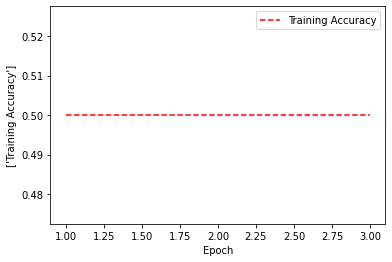

In [96]:
# Finally we call the function
grid_search(data_path, epochs, mode, model_name, h1, lr_grid, batch_size_grid, momentum_grid)